In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dart_file = '../Data/Dart/Dart_Nov.csv'

In [2]:
dart_df = pd.read_csv(dart_file)

/data/anjliu/venv_kaggle_nfl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Do Loop for whole data

In [3]:
WEIGHTS_COLS = [
    'CAR1_PSNGLD_DEPART', 'CAR2_PSNGLD_DEPART', 'CAR3_PSNGLD_DEPART',
    'CAR4_PSNGLD_DEPART', 'CAR5_PSNGLD_DEPART', 'CAR6_PSNGLD_DEPART',
    'CAR7_PSNGLD_DEPART', 'CAR8_PSNGLD_DEPART'
]

SHOWN_COLS = [
    'TRIP_NAME', 'DAY_OF_OPERATION_DATE', 'STATION_NAME',
    'SEGMENT_DIRECTION_NAME', 'TRIP_ORGIN_STATION', 'TRIP_DESTINATION_STATION',
    'DWELL_ARRIVAL_CALC_TIME', 'DWELL_DEPART_CALC_TIME',
    'ACTUAL_ARRIVAL_PLATFORM'
]

result_df = pd.DataFrame(columns=[
    'Trip_Name', 'Origin', 'Destination', 'Trip_Start_Time', 'Trip_End_Time',
    'Max_Load_Weight', 'Max_Load_Car_ID', 'Max_Load_Station_Name',
    'Max_Load_Platform', 'Direction'
])

from tqdm import tqdm
all_days = set(dart_df.DAY_OF_OPERATION_DATE)
#all_days

for each_day in tqdm(all_days):
    day_df = dart_df[dart_df.DAY_OF_OPERATION_DATE.isin([each_day])]
    day_df = day_df.sort_values(
        ['DAY_OF_OPERATION_DATE', 'TRIP_NAME', 'DWELL_ARRIVAL_CALC_TIME'])

    cols_df = day_df[SHOWN_COLS + WEIGHTS_COLS]
    day_trip_set = set(cols_df['TRIP_NAME'])

    for t in day_trip_set:
        Trip_Name = t
        today_trip_df = cols_df[cols_df['TRIP_NAME'] == t]

        if today_trip_df[WEIGHTS_COLS].isna().sum().sum() == today_trip_df[
                WEIGHTS_COLS].shape[0] * today_trip_df[WEIGHTS_COLS].shape[1]:
            print("On day {}, trip {} has full weights of NaN".format(
                each_day, t))
            continue

        Origin = today_trip_df['TRIP_ORGIN_STATION'].iloc[0]
        Destination = today_trip_df['TRIP_DESTINATION_STATION'].iloc[0]
        Trip_Start_Time = today_trip_df['DWELL_DEPART_CALC_TIME'].iloc[0]
        Trip_End_Time = today_trip_df['DWELL_DEPART_CALC_TIME'].iloc[-1]
        Direction = today_trip_df['SEGMENT_DIRECTION_NAME'].iloc[0]

        idx_weight_max = today_trip_df[WEIGHTS_COLS].max(axis=1).idxmax(axis=0)
        Max_Load_Station_Name = today_trip_df.loc[idx_weight_max][
            'STATION_NAME']
        Max_Load_Platform = today_trip_df.loc[idx_weight_max][
            'ACTUAL_ARRIVAL_PLATFORM']
        Max_Load_Car_ID = today_trip_df[WEIGHTS_COLS].idxmax(
            axis=1).loc[idx_weight_max]
        Max_Load_Weight = today_trip_df[WEIGHTS_COLS].max(axis=1).max()

        rows = {
            'Trip_Name': Trip_Name,
            'Origin': Origin,
            'Destination': Destination,
            'Trip_Start_Time': Trip_Start_Time,
            'Trip_End_Time': Trip_End_Time,
            'Max_Load_Weight': Max_Load_Weight,
            'Max_Load_Car_ID': Max_Load_Car_ID,
            'Max_Load_Station_Name': Max_Load_Station_Name,
            'Max_Load_Platform': Max_Load_Platform,
            'Direction': Direction
        }

        result_df = result_df.append(rows, ignore_index=True)

  0%|          | 0/30 [00:00<?, ?it/s]

On day 11/NOV/19, trip 151D has full weights of NaN
On day 11/NOV/19, trip 151E has full weights of NaN
On day 11/NOV/19, trip 155H has full weights of NaN
On day 11/NOV/19, trip 151C has full weights of NaN
On day 11/NOV/19, trip 149V has full weights of NaN
On day 11/NOV/19, trip 151F has full weights of NaN
On day 11/NOV/19, trip 87-Y has full weights of NaN


  3%|▎         | 1/30 [00:12<06:00, 12.43s/it]

On day 04/NOV/19, trip 60-K has full weights of NaN
On day 04/NOV/19, trip 93-T has full weights of NaN
On day 04/NOV/19, trip 60-G has full weights of NaN


  7%|▋         | 2/30 [00:25<05:49, 12.49s/it]

On day 13/NOV/19, trip 93-T has full weights of NaN
On day 13/NOV/19, trip 90XV has full weights of NaN
On day 13/NOV/19, trip 99-X has full weights of NaN
On day 13/NOV/19, trip 149V has full weights of NaN
On day 13/NOV/19, trip 91-Z has full weights of NaN


 10%|█         | 3/30 [00:37<05:40, 12.60s/it]

On day 27/NOV/19, trip 162S has full weights of NaN
On day 27/NOV/19, trip 153K has full weights of NaN
On day 27/NOV/19, trip 10XY has full weights of NaN
On day 27/NOV/19, trip 127V has full weights of NaN
On day 27/NOV/19, trip 129H has full weights of NaN
On day 27/NOV/19, trip 542M has full weights of NaN
On day 27/NOV/19, trip 159H has full weights of NaN
On day 27/NOV/19, trip 129G has full weights of NaN
On day 27/NOV/19, trip 151N has full weights of NaN
On day 27/NOV/19, trip 125E has full weights of NaN
On day 27/NOV/19, trip 884H has full weights of NaN
On day 27/NOV/19, trip 127R has full weights of NaN
On day 27/NOV/19, trip 109F has full weights of NaN
On day 27/NOV/19, trip 166T has full weights of NaN
On day 27/NOV/19, trip 127U has full weights of NaN
On day 27/NOV/19, trip 560K has full weights of NaN


 13%|█▎        | 4/30 [00:51<05:31, 12.76s/it]

On day 30/NOV/19, trip 851X has full weights of NaN
On day 30/NOV/19, trip 823U has full weights of NaN
On day 30/NOV/19, trip 841X has full weights of NaN
On day 30/NOV/19, trip 861S has full weights of NaN
On day 30/NOV/19, trip 860U has full weights of NaN
On day 30/NOV/19, trip 843P has full weights of NaN
On day 30/NOV/19, trip L1FB has full weights of NaN
On day 30/NOV/19, trip L1FA has full weights of NaN
On day 30/NOV/19, trip 861R has full weights of NaN
On day 30/NOV/19, trip 860Z has full weights of NaN
On day 30/NOV/19, trip 860T has full weights of NaN
On day 30/NOV/19, trip L1FD has full weights of NaN
On day 30/NOV/19, trip 821Z has full weights of NaN
On day 30/NOV/19, trip 861V has full weights of NaN
On day 30/NOV/19, trip 860V has full weights of NaN
On day 30/NOV/19, trip 860W has full weights of NaN
On day 30/NOV/19, trip L1FC has full weights of NaN


 17%|█▋        | 5/30 [01:09<05:59, 14.39s/it]

On day 16/NOV/19, trip 95-J has full weights of NaN
On day 16/NOV/19, trip 725F has full weights of NaN
On day 16/NOV/19, trip 715B has full weights of NaN
On day 16/NOV/19, trip L1BL has full weights of NaN
On day 16/NOV/19, trip 707L has full weights of NaN
On day 16/NOV/19, trip 715A has full weights of NaN
On day 16/NOV/19, trip 88-J has full weights of NaN
On day 16/NOV/19, trip 715C has full weights of NaN
On day 16/NOV/19, trip 16-W has full weights of NaN
On day 16/NOV/19, trip 92-V has full weights of NaN
On day 16/NOV/19, trip L1DJ has full weights of NaN
On day 16/NOV/19, trip 88-L has full weights of NaN
On day 16/NOV/19, trip 715P has full weights of NaN
On day 16/NOV/19, trip 718L has full weights of NaN
On day 16/NOV/19, trip L1BA has full weights of NaN
On day 16/NOV/19, trip 92-T has full weights of NaN
On day 16/NOV/19, trip L1EX has full weights of NaN
On day 16/NOV/19, trip 715D has full weights of NaN
On day 16/NOV/19, trip L1BB has full weights of NaN


 20%|██        | 6/30 [01:23<05:41, 14.21s/it]

On day 22/NOV/19, trip 159T has full weights of NaN
On day 22/NOV/19, trip 159U has full weights of NaN
On day 22/NOV/19, trip 159J has full weights of NaN
On day 22/NOV/19, trip 159K has full weights of NaN
On day 22/NOV/19, trip 159F has full weights of NaN
On day 22/NOV/19, trip 159X has full weights of NaN
On day 22/NOV/19, trip 124U has full weights of NaN
On day 22/NOV/19, trip 159W has full weights of NaN
On day 22/NOV/19, trip 159Y has full weights of NaN
On day 22/NOV/19, trip 124M has full weights of NaN
On day 22/NOV/19, trip 159S has full weights of NaN
On day 22/NOV/19, trip 83-U has full weights of NaN
On day 22/NOV/19, trip 84XA has full weights of NaN
On day 22/NOV/19, trip 159N has full weights of NaN
On day 22/NOV/19, trip 83-V has full weights of NaN
On day 22/NOV/19, trip 159V has full weights of NaN
On day 22/NOV/19, trip 159R has full weights of NaN
On day 22/NOV/19, trip 98XA has full weights of NaN
On day 22/NOV/19, trip 165K has full weights of NaN
On day 22/NO

 23%|██▎       | 7/30 [01:39<05:41, 14.86s/it]

On day 09/NOV/19, trip 93-T has full weights of NaN
On day 09/NOV/19, trip 92XX has full weights of NaN
On day 09/NOV/19, trip 757A has full weights of NaN
On day 09/NOV/19, trip 128N has full weights of NaN
On day 09/NOV/19, trip 93-H has full weights of NaN
On day 09/NOV/19, trip 99XA has full weights of NaN
On day 09/NOV/19, trip 93-G has full weights of NaN
On day 09/NOV/19, trip 93-K has full weights of NaN


 27%|██▋       | 8/30 [01:53<05:20, 14.58s/it]

On day 09/NOV/19, trip 93-J has full weights of NaN
On day 28/NOV/19, trip 131G has full weights of NaN
On day 28/NOV/19, trip 10XY has full weights of NaN
On day 28/NOV/19, trip 131E has full weights of NaN
On day 28/NOV/19, trip 165H has full weights of NaN
On day 28/NOV/19, trip 139S has full weights of NaN
On day 28/NOV/19, trip 124V has full weights of NaN
On day 28/NOV/19, trip 87-Y has full weights of NaN
On day 28/NOV/19, trip 139R has full weights of NaN
On day 28/NOV/19, trip 61-U has full weights of NaN
On day 28/NOV/19, trip 90XW has full weights of NaN
On day 28/NOV/19, trip 124T has full weights of NaN


 30%|███       | 9/30 [02:09<05:14, 14.97s/it]

On day 01/NOV/19, trip 95XY has full weights of NaN
On day 01/NOV/19, trip 99-R has full weights of NaN
On day 01/NOV/19, trip 95-S has full weights of NaN
On day 01/NOV/19, trip 98XA has full weights of NaN


 33%|███▎      | 10/30 [02:25<05:09, 15.48s/it]

On day 19/NOV/19, trip 151P has full weights of NaN
On day 19/NOV/19, trip 151M has full weights of NaN
On day 19/NOV/19, trip 151K has full weights of NaN
On day 19/NOV/19, trip 151W has full weights of NaN
On day 19/NOV/19, trip 166J has full weights of NaN
On day 19/NOV/19, trip 9--R has full weights of NaN
On day 19/NOV/19, trip 135D has full weights of NaN
On day 19/NOV/19, trip 151L has full weights of NaN
On day 19/NOV/19, trip 151V has full weights of NaN
On day 19/NOV/19, trip 151D has full weights of NaN
On day 19/NOV/19, trip 151E has full weights of NaN
On day 19/NOV/19, trip 151N has full weights of NaN
On day 19/NOV/19, trip 149W has full weights of NaN
On day 19/NOV/19, trip 166U has full weights of NaN
On day 19/NOV/19, trip 151J has full weights of NaN
On day 19/NOV/19, trip 135A has full weights of NaN
On day 19/NOV/19, trip 9--T has full weights of NaN
On day 19/NOV/19, trip 151C has full weights of NaN
On day 19/NOV/19, trip 144N has full weights of NaN
On day 19/NO

 37%|███▋      | 11/30 [02:41<04:55, 15.53s/it]

On day 14/NOV/19, trip 540T has full weights of NaN
On day 14/NOV/19, trip 169R has full weights of NaN
On day 14/NOV/19, trip 169N has full weights of NaN
On day 14/NOV/19, trip 169T has full weights of NaN
On day 14/NOV/19, trip 97-X has full weights of NaN
On day 14/NOV/19, trip 169L has full weights of NaN
On day 14/NOV/19, trip 169D has full weights of NaN
On day 14/NOV/19, trip 97-Y has full weights of NaN
On day 14/NOV/19, trip 169M has full weights of NaN
On day 14/NOV/19, trip 169V has full weights of NaN
On day 14/NOV/19, trip 169X has full weights of NaN
On day 14/NOV/19, trip 129G has full weights of NaN
On day 14/NOV/19, trip 169U has full weights of NaN
On day 14/NOV/19, trip 169W has full weights of NaN
On day 14/NOV/19, trip 169F has full weights of NaN
On day 14/NOV/19, trip 169J has full weights of NaN
On day 14/NOV/19, trip 149V has full weights of NaN
On day 14/NOV/19, trip 169S has full weights of NaN
On day 14/NOV/19, trip 169G has full weights of NaN
On day 14/NO

 40%|████      | 12/30 [02:54<04:27, 14.87s/it]

On day 20/NOV/19, trip 93-T has full weights of NaN
On day 20/NOV/19, trip 83-W has full weights of NaN
On day 20/NOV/19, trip 153F has full weights of NaN
On day 20/NOV/19, trip 91-Z has full weights of NaN


 43%|████▎     | 13/30 [03:14<04:36, 16.24s/it]

On day 12/NOV/19, trip 164B has full weights of NaN
On day 12/NOV/19, trip 164G has full weights of NaN
On day 12/NOV/19, trip 121W has full weights of NaN
On day 12/NOV/19, trip 93-T has full weights of NaN
On day 12/NOV/19, trip 164J has full weights of NaN
On day 12/NOV/19, trip 164E has full weights of NaN
On day 12/NOV/19, trip 164F has full weights of NaN
On day 12/NOV/19, trip 564M has full weights of NaN
On day 12/NOV/19, trip 149V has full weights of NaN
On day 12/NOV/19, trip 164H has full weights of NaN
On day 12/NOV/19, trip 164K has full weights of NaN
On day 12/NOV/19, trip 121V has full weights of NaN
On day 12/NOV/19, trip 87-Y has full weights of NaN
On day 12/NOV/19, trip 164D has full weights of NaN
On day 12/NOV/19, trip 164C has full weights of NaN
On day 12/NOV/19, trip 121L has full weights of NaN
On day 12/NOV/19, trip 564L has full weights of NaN


 47%|████▋     | 14/30 [03:31<04:22, 16.39s/it]

On day 08/NOV/19, trip 133P has full weights of NaN
On day 08/NOV/19, trip 145F has full weights of NaN
On day 08/NOV/19, trip 150J has full weights of NaN
On day 08/NOV/19, trip 150M has full weights of NaN
On day 08/NOV/19, trip 95XY has full weights of NaN
On day 08/NOV/19, trip 167G has full weights of NaN
On day 08/NOV/19, trip 150N has full weights of NaN
On day 08/NOV/19, trip 150V has full weights of NaN
On day 08/NOV/19, trip 95-Y has full weights of NaN
On day 08/NOV/19, trip 150K has full weights of NaN
On day 08/NOV/19, trip 130G has full weights of NaN
On day 08/NOV/19, trip 150P has full weights of NaN
On day 08/NOV/19, trip 140N has full weights of NaN
On day 08/NOV/19, trip 150L has full weights of NaN
On day 08/NOV/19, trip 68-W has full weights of NaN
On day 08/NOV/19, trip 178Z has full weights of NaN
On day 08/NOV/19, trip 167E has full weights of NaN
On day 08/NOV/19, trip 87-V has full weights of NaN
On day 08/NOV/19, trip 150H has full weights of NaN
On day 08/NO

 50%|█████     | 15/30 [03:46<04:03, 16.22s/it]

On day 17/NOV/19, trip B1EZ has full weights of NaN
On day 17/NOV/19, trip 714A has full weights of NaN


 53%|█████▎    | 16/30 [04:01<03:42, 15.87s/it]

On day 15/NOV/19, trip 95XY has full weights of NaN
On day 15/NOV/19, trip 123K has full weights of NaN
On day 15/NOV/19, trip 64-M has full weights of NaN
On day 15/NOV/19, trip 64-J has full weights of NaN
On day 15/NOV/19, trip 123M has full weights of NaN
On day 15/NOV/19, trip 98-J has full weights of NaN
On day 15/NOV/19, trip 98-K has full weights of NaN
On day 15/NOV/19, trip 83-R has full weights of NaN
On day 15/NOV/19, trip 123L has full weights of NaN
On day 15/NOV/19, trip 98XA has full weights of NaN
On day 15/NOV/19, trip 97XY has full weights of NaN


 57%|█████▋    | 17/30 [04:21<03:39, 16.88s/it]

On day 25/NOV/19, trip 93-T has full weights of NaN
On day 25/NOV/19, trip 169X has full weights of NaN
On day 25/NOV/19, trip 60-U has full weights of NaN
On day 25/NOV/19, trip 169Y has full weights of NaN
On day 25/NOV/19, trip 125F has full weights of NaN
On day 25/NOV/19, trip 91-Z has full weights of NaN


 60%|██████    | 18/30 [04:41<03:34, 17.89s/it]

On day 10/NOV/19, trip 16-H has full weights of NaN
On day 10/NOV/19, trip 16-S has full weights of NaN
On day 10/NOV/19, trip 16-V has full weights of NaN
On day 10/NOV/19, trip 16-G has full weights of NaN
On day 10/NOV/19, trip 131R has full weights of NaN
On day 10/NOV/19, trip 16-M has full weights of NaN
On day 10/NOV/19, trip 16-R has full weights of NaN
On day 10/NOV/19, trip 16-J has full weights of NaN
On day 10/NOV/19, trip 16-L has full weights of NaN


 67%|██████▋   | 20/30 [05:14<02:55, 17.51s/it]

On day 06/NOV/19, trip L1FC has full weights of NaN
On day 02/NOV/19, trip L2CT has full weights of NaN
On day 02/NOV/19, trip 840U has full weights of NaN
On day 02/NOV/19, trip 775M has full weights of NaN
On day 02/NOV/19, trip L2DS has full weights of NaN
On day 02/NOV/19, trip L2DX has full weights of NaN
On day 02/NOV/19, trip L2DB has full weights of NaN
On day 02/NOV/19, trip L2DN has full weights of NaN
On day 02/NOV/19, trip 775K has full weights of NaN
On day 02/NOV/19, trip L2BG has full weights of NaN
On day 02/NOV/19, trip L2DF has full weights of NaN
On day 02/NOV/19, trip L2BL has full weights of NaN
On day 02/NOV/19, trip L2CD has full weights of NaN
On day 02/NOV/19, trip L2BS has full weights of NaN
On day 02/NOV/19, trip L2CJ has full weights of NaN
On day 02/NOV/19, trip L2CW has full weights of NaN
On day 02/NOV/19, trip L2EF has full weights of NaN
On day 02/NOV/19, trip L2DY has full weights of NaN
On day 02/NOV/19, trip 774J has full weights of NaN
On day 02/NO

 70%|███████   | 21/30 [05:37<02:51, 19.11s/it]

On day 29/NOV/19, trip 98XA has full weights of NaN
On day 29/NOV/19, trip 97XY has full weights of NaN


 73%|███████▎  | 22/30 [05:59<02:37, 19.74s/it]

On day 05/NOV/19, trip 121W has full weights of NaN
On day 05/NOV/19, trip 128P has full weights of NaN
On day 05/NOV/19, trip 162S has full weights of NaN
On day 05/NOV/19, trip 93-T has full weights of NaN
On day 05/NOV/19, trip 86-J has full weights of NaN
On day 05/NOV/19, trip 141D has full weights of NaN
On day 05/NOV/19, trip 163G has full weights of NaN
On day 05/NOV/19, trip 81-G has full weights of NaN
On day 05/NOV/19, trip 141C has full weights of NaN
On day 05/NOV/19, trip 121S has full weights of NaN
On day 05/NOV/19, trip 121V has full weights of NaN
On day 05/NOV/19, trip 560H has full weights of NaN
On day 05/NOV/19, trip 141B has full weights of NaN
On day 05/NOV/19, trip 141A has full weights of NaN
On day 05/NOV/19, trip 141E has full weights of NaN


 77%|███████▋  | 23/30 [06:18<02:18, 19.75s/it]

On day 18/NOV/19, trip 145C has full weights of NaN
On day 18/NOV/19, trip 145F has full weights of NaN
On day 18/NOV/19, trip 145N has full weights of NaN
On day 18/NOV/19, trip 85-N has full weights of NaN
On day 18/NOV/19, trip 145L has full weights of NaN
On day 18/NOV/19, trip 145R has full weights of NaN
On day 18/NOV/19, trip 145P has full weights of NaN
On day 18/NOV/19, trip 98-W has full weights of NaN
On day 18/NOV/19, trip 145E has full weights of NaN
On day 18/NOV/19, trip 145K has full weights of NaN
On day 18/NOV/19, trip 145H has full weights of NaN
On day 18/NOV/19, trip 145B has full weights of NaN
On day 18/NOV/19, trip 85-M has full weights of NaN
On day 18/NOV/19, trip 145G has full weights of NaN
On day 18/NOV/19, trip 96-U has full weights of NaN
On day 18/NOV/19, trip 145D has full weights of NaN
On day 18/NOV/19, trip 145J has full weights of NaN
On day 18/NOV/19, trip 145M has full weights of NaN
On day 18/NOV/19, trip 86-L has full weights of NaN


 80%|████████  | 24/30 [06:39<02:00, 20.03s/it]

On day 03/NOV/19, trip L1AA has full weights of NaN
On day 03/NOV/19, trip L2EF has full weights of NaN
On day 03/NOV/19, trip 818M has full weights of NaN
On day 03/NOV/19, trip L1A- has full weights of NaN
On day 03/NOV/19, trip L1AB has full weights of NaN
On day 03/NOV/19, trip L2EG has full weights of NaN
On day 03/NOV/19, trip 762D has full weights of NaN
On day 03/NOV/19, trip 837X has full weights of NaN
On day 03/NOV/19, trip 762E has full weights of NaN
On day 03/NOV/19, trip 3--U has full weights of NaN
On day 03/NOV/19, trip L1AC has full weights of NaN


 83%|████████▎ | 25/30 [07:04<01:47, 21.41s/it]

On day 21/NOV/19, trip 93-T has full weights of NaN
On day 21/NOV/19, trip 136C has full weights of NaN
On day 21/NOV/19, trip 160B has full weights of NaN
On day 21/NOV/19, trip 64-H has full weights of NaN
On day 21/NOV/19, trip 136E has full weights of NaN
On day 21/NOV/19, trip 146U has full weights of NaN
On day 21/NOV/19, trip 130J has full weights of NaN
On day 21/NOV/19, trip 146V has full weights of NaN
On day 21/NOV/19, trip 136M has full weights of NaN
On day 21/NOV/19, trip 130L has full weights of NaN
On day 21/NOV/19, trip 91-Z has full weights of NaN


 87%|████████▋ | 26/30 [07:24<01:24, 21.22s/it]

On day 26/NOV/19, trip 167J has full weights of NaN
On day 26/NOV/19, trip 10XY has full weights of NaN
On day 26/NOV/19, trip 127J has full weights of NaN
On day 26/NOV/19, trip 61-U has full weights of NaN
On day 26/NOV/19, trip 91-Z has full weights of NaN


 90%|█████████ | 27/30 [07:43<01:01, 20.48s/it]

On day 26/NOV/19, trip 167K has full weights of NaN
On day 24/NOV/19, trip 729C has full weights of NaN
On day 24/NOV/19, trip 734A has full weights of NaN
On day 24/NOV/19, trip 734X has full weights of NaN
On day 24/NOV/19, trip 776B has full weights of NaN


 93%|█████████▎| 28/30 [08:10<00:44, 22.31s/it]

On day 07/NOV/19, trip 93-T has full weights of NaN
On day 07/NOV/19, trip 29-H has full weights of NaN
On day 07/NOV/19, trip 83-B has full weights of NaN
On day 07/NOV/19, trip 29-J has full weights of NaN


 97%|█████████▋| 29/30 [08:33<00:22, 22.57s/it]

On day 23/NOV/19, trip 733Y has full weights of NaN
On day 23/NOV/19, trip 738J has full weights of NaN
On day 23/NOV/19, trip 739F has full weights of NaN
On day 23/NOV/19, trip 738Z has full weights of NaN
On day 23/NOV/19, trip 738G has full weights of NaN
On day 23/NOV/19, trip 817N has full weights of NaN
On day 23/NOV/19, trip 739G has full weights of NaN
On day 23/NOV/19, trip 817B has full weights of NaN
On day 23/NOV/19, trip 739X has full weights of NaN
On day 23/NOV/19, trip 733E has full weights of NaN
On day 23/NOV/19, trip 734S has full weights of NaN
On day 23/NOV/19, trip 734E has full weights of NaN
On day 23/NOV/19, trip 733C has full weights of NaN
On day 23/NOV/19, trip 733J has full weights of NaN
On day 23/NOV/19, trip 734D has full weights of NaN
On day 23/NOV/19, trip 739A has full weights of NaN
On day 23/NOV/19, trip 738H has full weights of NaN
On day 23/NOV/19, trip 734P has full weights of NaN
On day 23/NOV/19, trip 734G has full weights of NaN
On day 23/NO

100%|██████████| 30/30 [08:51<00:00, 17.72s/it]

On day 23/NOV/19, trip 744A has full weights of NaN
On day 23/NOV/19, trip 818H has full weights of NaN


In [4]:
level_df = result_df.copy()

In [5]:
def weights_to_level(car, weight):
    kg_per_person = 75
    level = None
    if car == 'CAR1':
        if weight <= 27 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 27 * kg_per_person) and (weight <= 35 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 35 * kg_per_person:
            level = 'Red_Max'
    elif car == 'CAR2':
        if weight <= 33 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 33 * kg_per_person) and (weight <= 43 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 43 * kg_per_person:
            level = 'Red_Max'
    elif car == 'CAR3':
        if weight <= 33 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 33 * kg_per_person) and (weight <= 43 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 43 * kg_per_person:
            level = 'Red_Max'

    elif car == 'CAR4':
        if weight <= 29 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 29 * kg_per_person) and (weight <= 38 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 38 * kg_per_person:
            level = 'Red_Max'

    elif car == 'CAR5':
        if weight <= 29 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 29 * kg_per_person) and (weight <= 38 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 38 * kg_per_person:
            level = 'Red_Max'

    elif car == 'CAR6':
        if weight <= 33 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 33 * kg_per_person) and (weight <= 43 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 43 * kg_per_person:
            level = 'Red_Max'
    elif car == 'CAR7':
        if weight <= 33 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 33 * kg_per_person) and (weight <= 43 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 43 * kg_per_person:
            level = 'Red_Max'

    if car == 'CAR8':
        if weight <= 27 * kg_per_person:
            level = 'Green_Safe'
        elif (weight > 27 * kg_per_person) and (weight <= 34 * kg_per_person):
            level = 'Yellow_Reaching'
        elif weight >= 34 * kg_per_person:
            level = 'Red_Max'

    #print(level, weight)
    return level

In [7]:
level_df['Max_Load_Car_ID'] = level_df['Max_Load_Car_ID'].apply(
    lambda x: x.split('_')[0])

In [8]:
level_df['Max_Load_Level'] = np.vectorize(weights_to_level)(
    level_df['Max_Load_Car_ID'], level_df['Max_Load_Weight'])

In [10]:
level_df['Trip_Start_Time'] = pd.to_datetime(level_df['Trip_Start_Time'])
level_df['Trip_End_Time'] = pd.to_datetime(level_df['Trip_End_Time'])

level_df['Today_Start_Time'] = level_df['Trip_Start_Time'].dt.time
level_df['Today_End_Time'] = level_df['Trip_End_Time'].dt.time

In [11]:
import datetime

def time_period(start_time, end_time):
    start_am_up = (start_time >= datetime.time(hour=7)) and (start_time <= datetime.time(hour=9))
    end_am_up = (end_time >= datetime.time(hour=7)) and (end_time <= datetime.time(hour=9))
    
    start_pm_down = (start_time >= datetime.time(hour=16)) and (start_time <= datetime.time(hour=18, minute=30))
    end_pm_down = (end_time >= datetime.time(hour=16)) and (end_time <= datetime.time(hour=18, minute=30))
    
    period = None
    if start_am_up or end_am_up:
        period = 'AM_UP'
    elif start_pm_down or end_pm_down:
        period = 'PM_DOWN'
    else:
        period = 'Others'
        
    return period

In [12]:
level_df['Time_Period'] = np.vectorize(time_period)(level_df['Today_Start_Time'], 
                                                            level_df['Today_End_Time'])

In [13]:
level_df.head()

,Trip_Name,Origin,Destination,Trip_Start_Time,Trip_End_Time,Max_Load_Weight,Max_Load_Car_ID,Max_Load_Station_Name,Max_Load_Platform,Direction,Max_Load_Level,Today_Start_Time,Today_End_Time,Time_Period
0,87-P,Macarthur,Central,2019-11-11 16:58:51,2019-11-11 18:00:52,7700.0,CAR4,Green Square,GQU1,Up,Red_Max,16:58:51,18:00:52,PM_DOWN
1,96-E,Leppington,Central,2019-11-11 13:00:58,2019-11-11 12:57:26,4330.0,CAR7,Newtown,NTN1,Up,Red_Max,13:00:58,12:57:26,Others
2,137F,Central,Hornsby,2019-11-11 07:30:57,2019-11-11 08:26:58,7200.0,CAR2,Eastwood,EWD3,Down,Red_Max,07:30:57,08:26:58,AM_UP
3,133P,Central,Penrith,2019-11-11 18:43:16,2019-11-11 20:01:48,2280.0,CAR5,Blacktown,BTN6,Down,Yellow_Reaching,18:43:16,20:01:48,Others
4,87-M,Birrong,Central,2019-11-11 14:43:45,2019-11-11 15:27:30,3040.0,CAR5,Erskineville,ERS1,Up,Red_Max,14:43:45,15:27:30,Others


### save results

In [24]:
level_df.to_csv('Load_Level_Nov.csv', index=False)

### load and plot

In [26]:
import pandas as pd
level_df = pd.read_csv('Load_Level_Nov.csv')

ct = pd.crosstab(level_df['Time_Period'], 
            level_df['Max_Load_Level'])
ct

Max_Load_Level,Green_Safe,Red_Max,Yellow_Reaching
Time_Period,,,
AM_UP,632,4029,254
Others,6166,12443,2401
PM_DOWN,348,5563,181


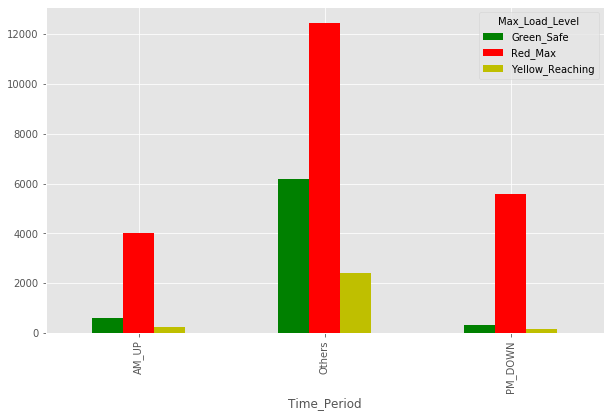

In [28]:
import seaborn as sns
my_colors = ['g', 'r', 'y']
ct.plot.bar(figsize=(10, 6), color=my_colors)